In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

from net.AutoEncoder import AutoEncoder


In [2]:
def imshow(img):
    img = torchvision.utils.make_grid(img)
    img = img / 2 + 0.5
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [3]:
selected_model = 'SGD_0.1_MSE_batch100_100epoch_div8_unbalanced'


In [4]:
model_path = f'./ckpt/{selected_model}/model_9.pth'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=56, shuffle=False, num_workers=2, drop_last=True)

model = AutoEncoder()
model.load_state_dict(torch.load(model_path))
model.eval()


Files already downloaded and verified


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=3072, out_features=1536, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1536, out_features=768, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=768, out_features=384, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=384, out_features=768, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=768, out_features=1536, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1536, out_features=3072, bias=True)
    (5): Tanh()
  )
)

In [5]:
testset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
iteration = iter(testloader)


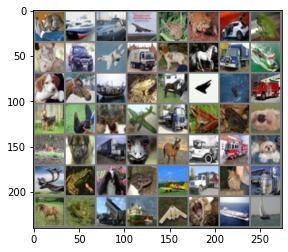

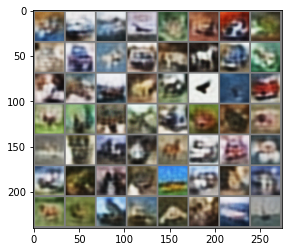

In [7]:
images, _ = next(iteration)

imshow(images)

images = images.reshape(-1, 3 * 32 * 32)

reconstructed = model(images)
reconstructed = reconstructed.reshape(-1, 3, 32, 32)

imshow(reconstructed)


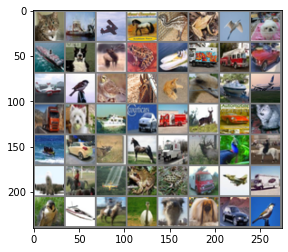

torch.Size([56, 384])


In [15]:
images, targets = next(iteration)

imshow(images)

images = images.reshape(-1, 3 * 32 * 32)

reconstructed = model.encoder(images)
print(reconstructed.shape)



In [9]:
testset.data.shape

(10000, 32, 32, 3)